**Data:** U.S. Bureau of Labor Statistics, Producer Price Index by Industry: Synthetic Rubber Manufacturing: Primary Products [PCU325212325212P], retrieved from FRED, Federal Reserve Bank of St. Louis; https://fred.stlouisfed.org/series/PCU325212325212P, September 20, 2024. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

path = r"C:\Users\HP\OneDrive\Escritorio\David Guzzi\Github\TSA\FRED_PCU32523252.csv"
df = pd.read_csv(path)

df.head()

,DATE,PCU32523252
0,1984-12-01,100.0
1,1985-01-01,100.1
2,1985-02-01,100.1
3,1985-03-01,99.7
4,1985-04-01,99.8


In [2]:
df.columns = ['date', 'synthetic_rubber']
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 477 entries, 0 to 476
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   date              477 non-null    object 
 1   synthetic_rubber  477 non-null    float64
dtypes: float64(1), object(1)
memory usage: 7.6+ KB


In [3]:
df['date'] = pd.to_datetime(df['date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 477 entries, 0 to 476
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   date              477 non-null    datetime64[ns]
 1   synthetic_rubber  477 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 7.6 KB


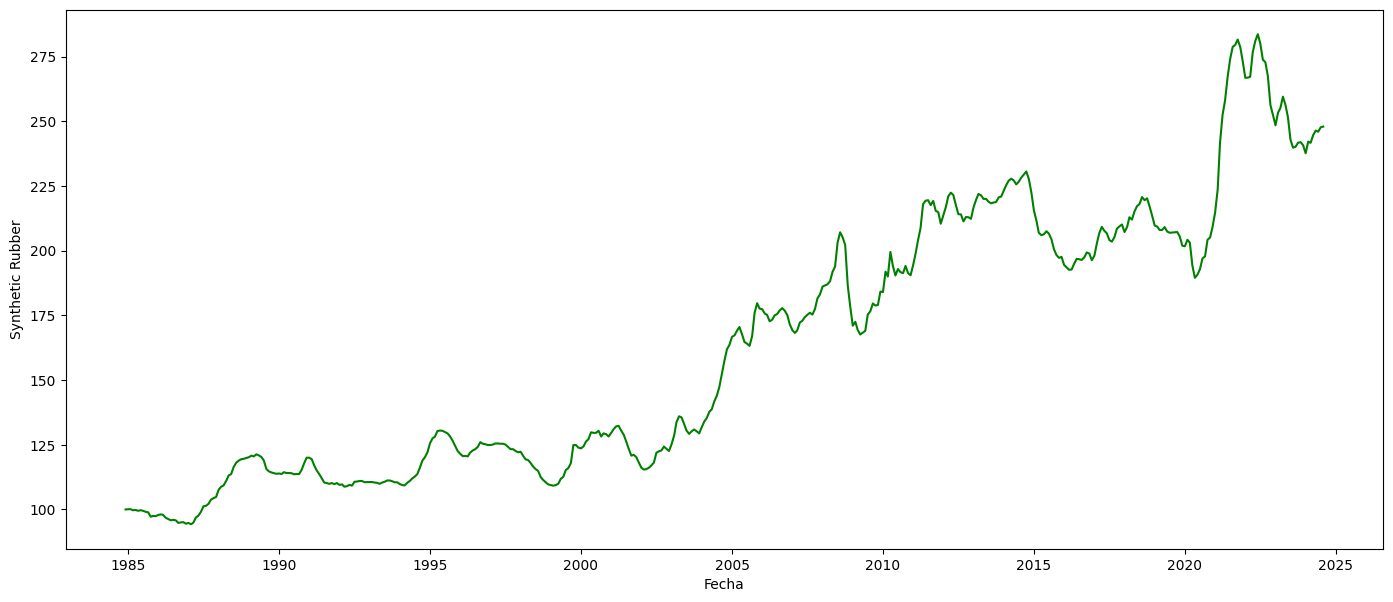

In [4]:
fig, ax = plt.subplots(figsize=(17, 7))
ax.plot(df['date'], df['synthetic_rubber'], c='green')
ax.set_xlabel('Fecha')
ax.set_ylabel('Synthetic Rubber')
plt.show()

In [5]:
df['date_year'] = df['date'].dt.year
df.head()

,date,synthetic_rubber,date_year
0,1984-12-01,100.0,1984
1,1985-01-01,100.1,1985
2,1985-02-01,100.1,1985
3,1985-03-01,99.7,1985
4,1985-04-01,99.8,1985


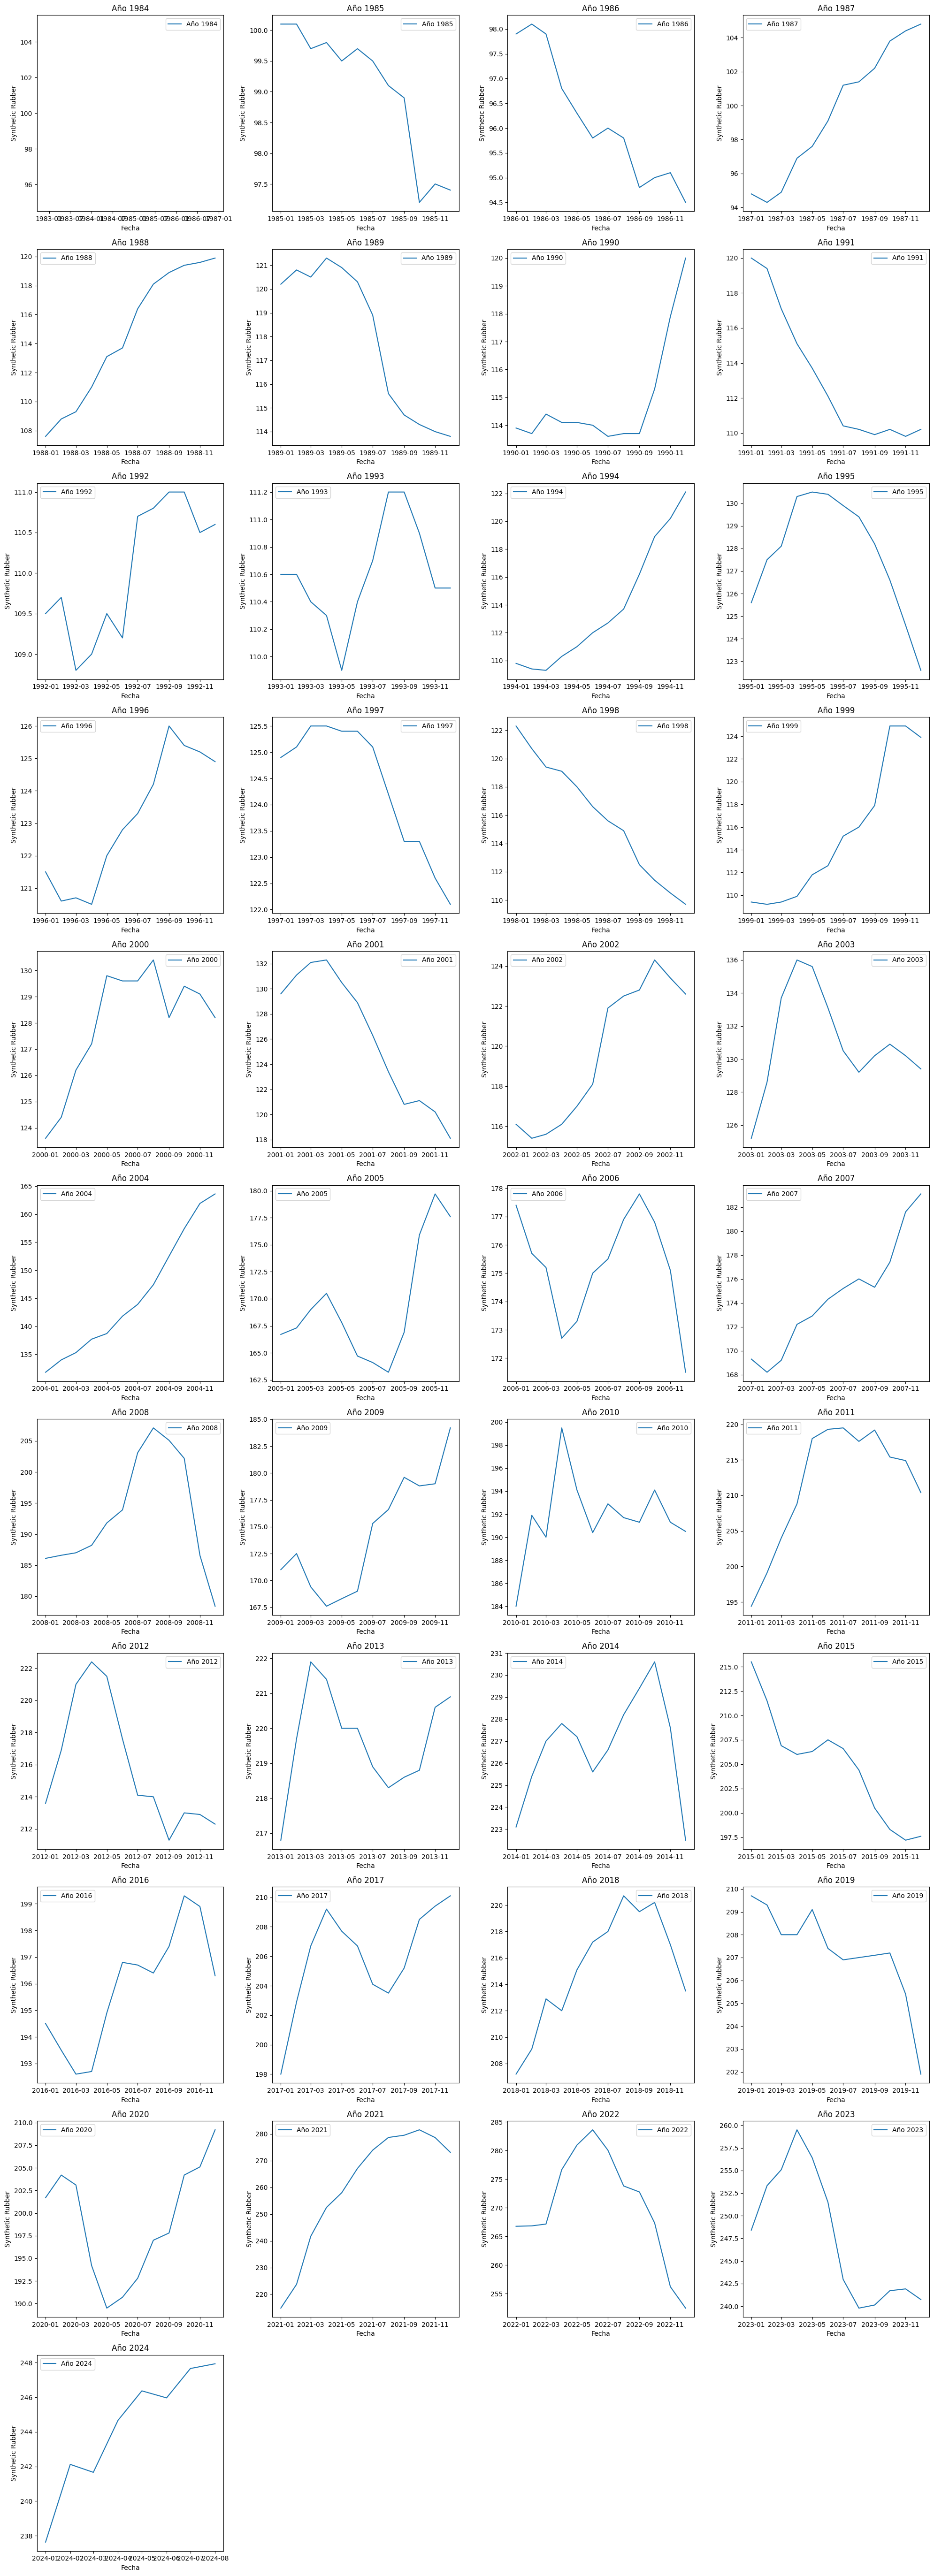

In [6]:
# Definir el número de gráficos por fila (ncols) y filas necesarias (nrows).
ncols = 4  # Número de columnas (gráficos por fila).
nrows = (len(df['date_year'].unique()) + ncols - 1) // ncols  # Número de filas necesarias.

# Crear un canvas con los subplots (figura con varios gráficos).
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20, 5*nrows))

# Aplanar los ejes para iterar fácilmente si hay más de un gráfico.
axes = axes.flatten()

# Iterar por cada año y graficar.
for i, year in enumerate(sorted(df['date_year'].unique())):
    df_year = df[df['date_year'] == year]
    
    # Graficar la serie para el año correspondiente.
    axes[i].plot(df_year['date'], df_year['synthetic_rubber'], label=f'Año {year}')
    
    # Configurar título y etiquetas.
    axes[i].set_title(f'Año {year}')
    axes[i].set_xlabel('Fecha')
    axes[i].set_ylabel('Synthetic Rubber')
    axes[i].legend()
# Eliminar cualquier subplot vacío (si sobran espacios en la cuadrícula)
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

# Ajustar el layout para evitar solapamientos.
plt.tight_layout()
plt.show()

In [7]:
import statsmodels.formula.api as smf
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.ar_model import AR
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller

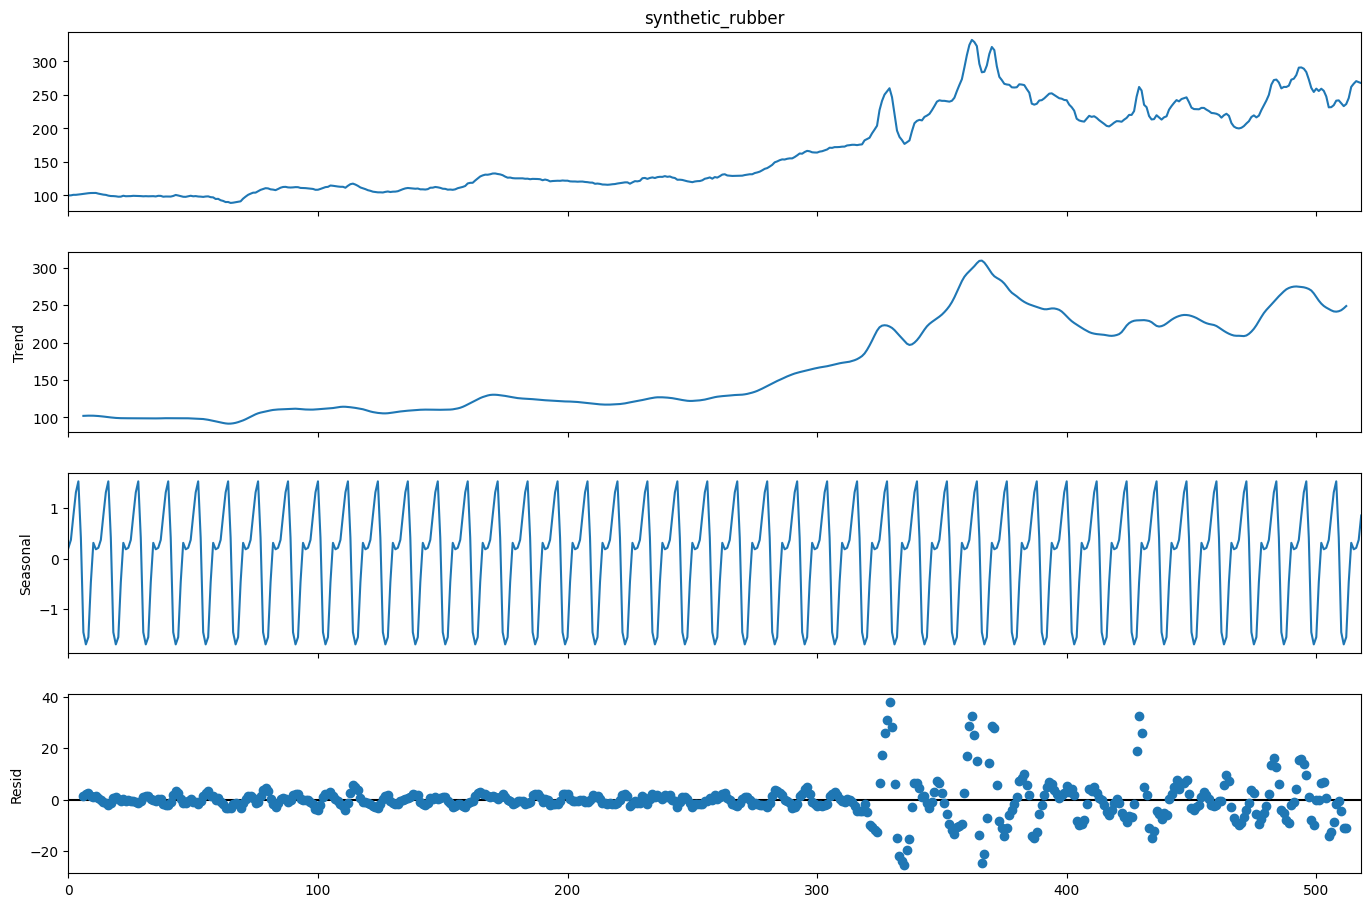

In [8]:
# decomposition (additive)
decomposition = sm.tsa.seasonal_decompose(df['synthetic_rubber'],period =12) 
fig = decomposition.plot()
fig.set_size_inches(15, 10)
plt.show()

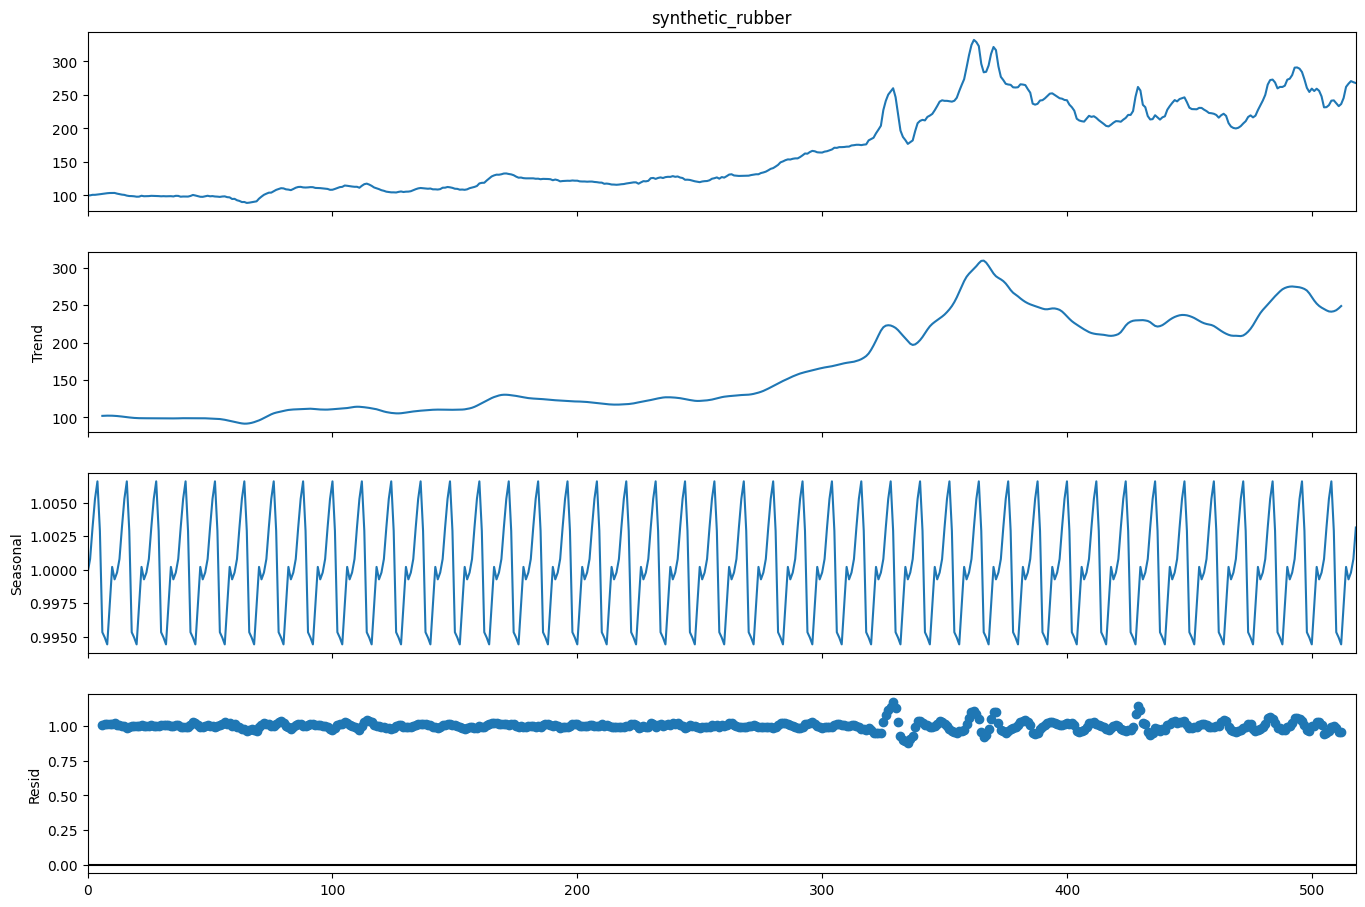

In [9]:
# decomposition (additive)
decomposition = sm.tsa.seasonal_decompose(df['synthetic_rubber'],period =12, model='multiplicative') 
fig = decomposition.plot()
fig.set_size_inches(15, 10)
plt.show()

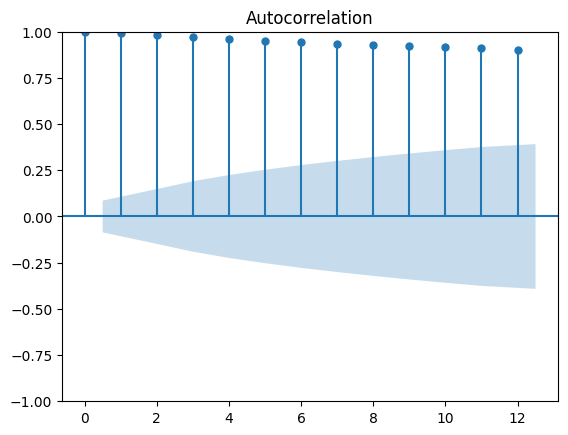

In [10]:
plot_acf(df['synthetic_rubber'], lags = 12)
print()

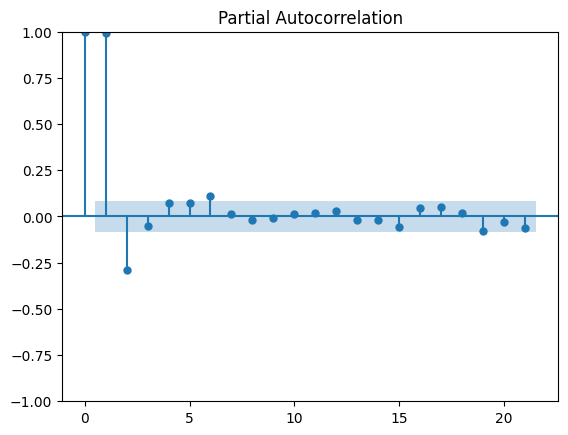

In [11]:
plot_pacf(df['synthetic_rubber'], lags = 21)
print()

In [12]:
X = df['synthetic_rubber']
split =  int(len(X) / 2)
X1, X2 = X[0:split], X[split:]
mean1, mean2 = X1.mean(), X2.mean()
var1, var2 = X1.var(), X2.var()
print('mean:')
print('chunk1: %.2f vs chunk2: %.2f' % (mean1, mean2))
print('variance:')
print('chunk1: %.2f vs chunk2: %.2f' % (var1, var2))

mean:
chunk1: 111.79 vs chunk2: 219.30
variance:
chunk1: 116.31 vs chunk2: 2145.07


In [13]:
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -0.955296
p-value: 0.769218
Critical Values:
	1%: -3.443
	5%: -2.867
	10%: -2.570


In [14]:
decomposition = seasonal_decompose(X, model='additive', period =12)
result = adfuller(decomposition.trend[10:-10])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: -0.278739
p-value: 0.928462


In [15]:
result = adfuller(decomposition.seasonal[10:-10])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: -1878084280831997.500000
p-value: 0.000000


In [16]:
result = adfuller(decomposition.resid[10:-10])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: -9.941262
p-value: 0.000000


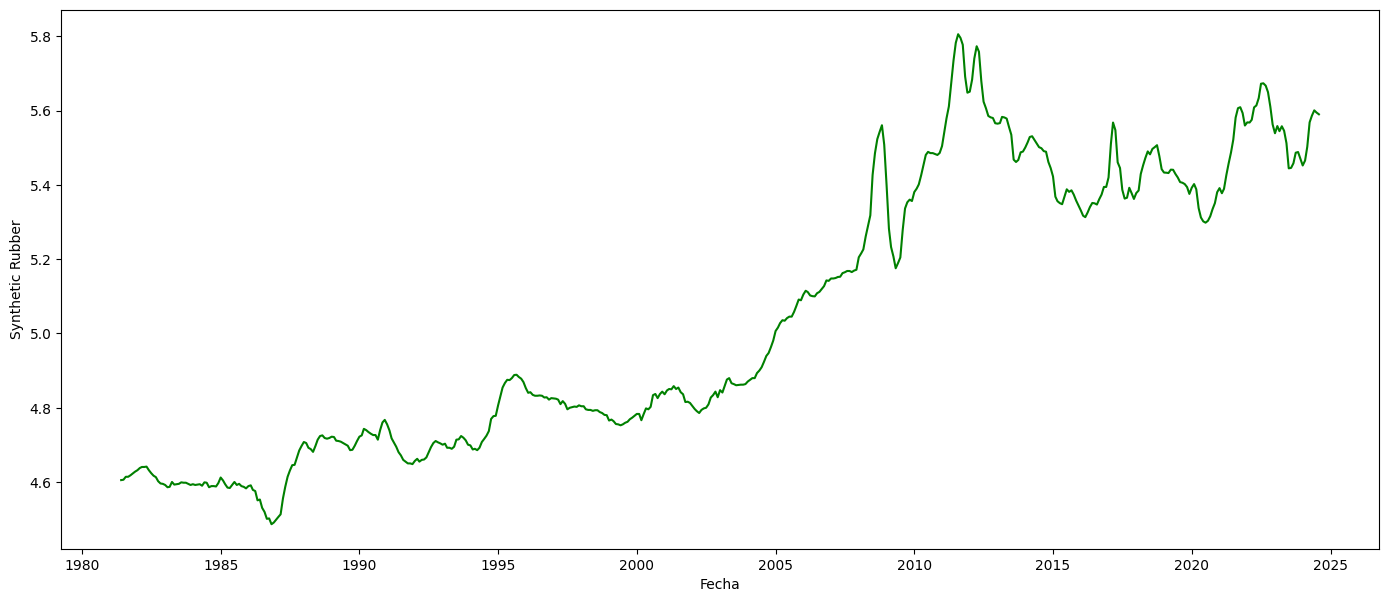

In [17]:
df['synthetic_rubber2'] = np.log(df['synthetic_rubber'])
fig, ax = plt.subplots(figsize=(17, 7))
ax.plot(df['date'], df['synthetic_rubber2'], c='green')
ax.set_xlabel('Fecha')
ax.set_ylabel('Synthetic Rubber')
plt.show()

In [18]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing, ExponentialSmoothing, Holt

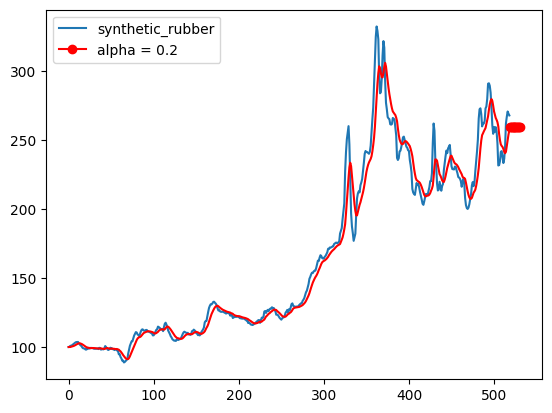

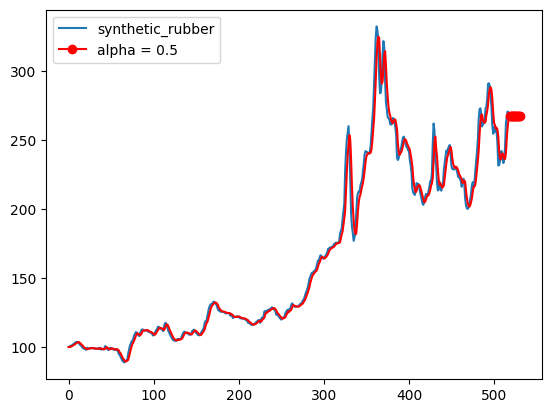

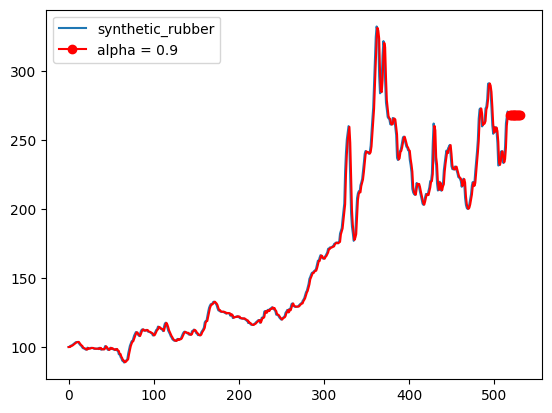

In [19]:
df_2 = df[['synthetic_rubber']]
for alpha_sm in [0.2 , 0.5, 0.9]:
    df_2.plot.line()
    fit1 = SimpleExpSmoothing(df_2).fit(smoothing_level = alpha_sm  ,optimized=False)
    fcast1 = fit1.forecast(12).rename('alpha = ' + str(alpha_sm))
    fcast1.plot(marker='o', color='red', legend=True)
    fit1.fittedvalues.plot(  color='red')
    plt.show()

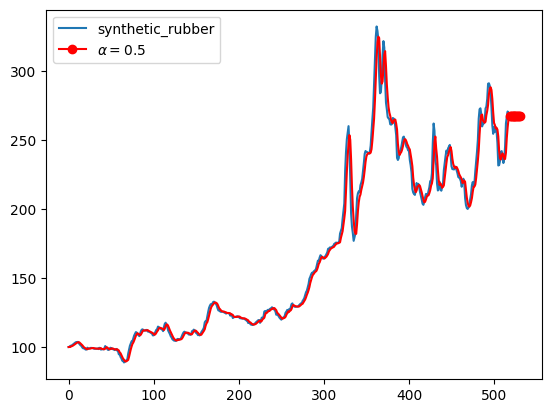

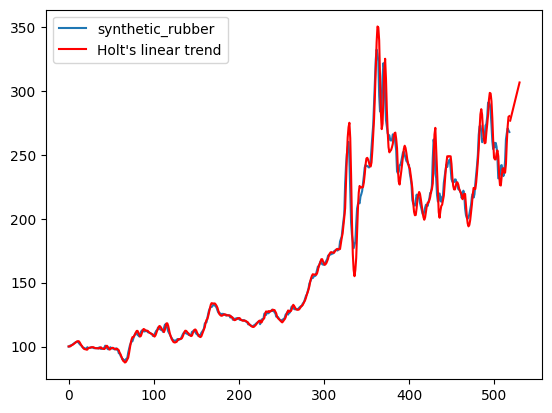

In [20]:
alpha = 0.5
df_2.plot.line()
fit1 = SimpleExpSmoothing(df_2).fit(smoothing_level= alpha,optimized=False)
fcast1 = fit1.forecast(12).rename(r'$\alpha=0.5$')
fcast1.plot(marker='o', color='red', legend=True)
fit1.fittedvalues.plot(  color='red')
plt.show()

df_2.plot.line()

fit1 = Holt(df_2).fit(smoothing_level=0.5, smoothing_trend=0.5, optimized=False)
fcast1 = fit1.forecast(12).rename("Holt's linear trend")
fit1.fittedvalues.plot(color='red')
fcast1.plot(color='red', legend=True)

plt.show()

<Axes: >

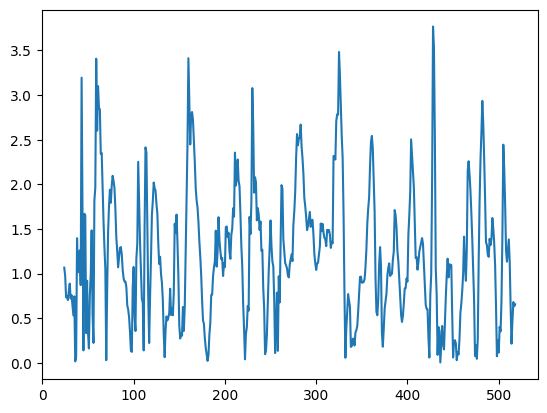

In [21]:
# pick a window size 
window_size = 25

# calculate rolling mean and standard deviation
xroll = df['synthetic_rubber'].rolling(window_size)
df['mean_roll'] = xroll.mean()
df['sd_roll'] = xroll.std()

# calculate the Z-score
df['zscore'] = np.abs( (df['synthetic_rubber'] - df['mean_roll']) / df['sd_roll'])
df['zscore'].plot()

In [22]:
df.loc[df['zscore'] > 3][['date', 'synthetic_rubber']]

,date,synthetic_rubber
43,1985-01-01,100.7
59,1986-05-01,94.7
61,1986-07-01,92.8
160,1994-10-01,117.9
230,2000-08-01,125.7
325,2008-07-01,227.4
326,2008-08-01,241.1
428,2017-02-01,247.3
429,2017-03-01,261.9


In [23]:
path = r"C:\Users\HP\OneDrive\Escritorio\David Guzzi\Github\TSA\FRED_PCU325212325212P.csv"
df = pd.read_csv(path)
df.columns = ['date', 'synthetic_rubber']
df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace = True)

df.head()

,synthetic_rubber
date,
1981-06-01,100.0
1981-07-01,100.1
1981-08-01,100.9
1981-09-01,100.9
1981-10-01,101.3


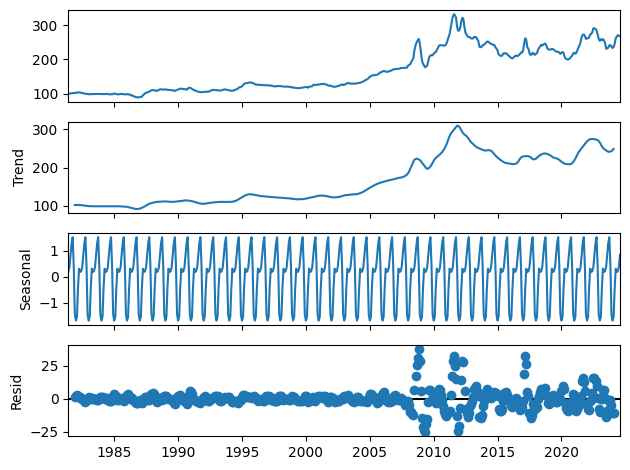

In [24]:
decomposition = sm.tsa.seasonal_decompose(df,period =12) 
figure = decomposition.plot()
plt.show()

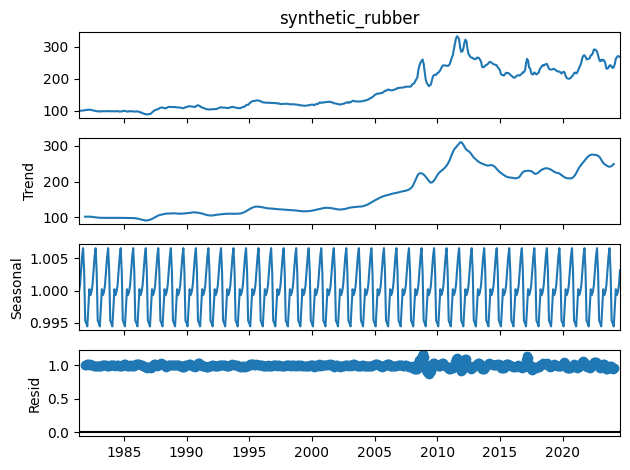

In [25]:
decomposition = sm.tsa.seasonal_decompose(df['synthetic_rubber'],period =12, model = 'multiplicative')
figure = decomposition.plot()
plt.show()

In [26]:
cutoff_date = '2015-12-31'
xtrain, xvalid  = df.loc[df.index <= cutoff_date], df.loc[df.index > cutoff_date]
print(xtrain.shape, xvalid.shape)

(415, 1) (104, 1)


In [27]:
fit1 = ExponentialSmoothing(xtrain['synthetic_rubber'].values, seasonal_periods=12, trend='mul', seasonal='mul', use_boxcox=True)
fit1 = fit1.fit()
fit1.params_formatted

,name,param,optimized
smoothing_level,alpha,0.959643,True
smoothing_trend,beta,0.514094,True
smoothing_seasonal,gamma,0.040357,True
initial_level,l.0,0.557159,True
initial_trend,b.0,0.999999,True
initial_seasons.0,s.0,1.000001,True
initial_seasons.1,s.1,1.000002,True
initial_seasons.2,s.2,0.999999,True
initial_seasons.3,s.3,1.000000,True
initial_seasons.4,s.4,0.999999,True


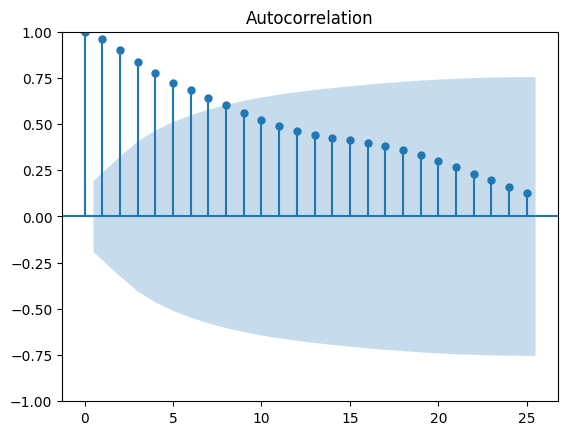

In [28]:
# What do the residuals look like?
prediction = fit1.forecast(len(xvalid)).copy()

xresiduals = xvalid['synthetic_rubber'] - prediction
plot_acf(xresiduals, lags = 25)
print()

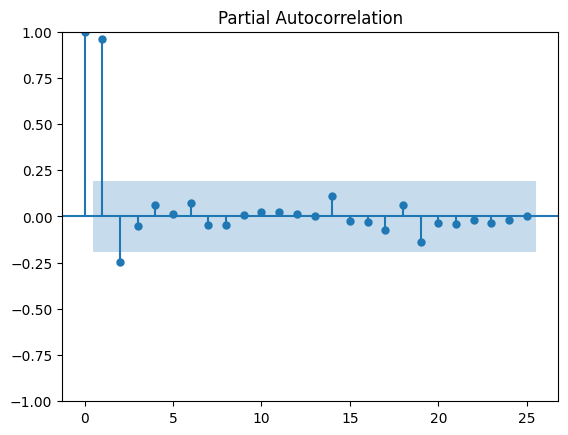

In [29]:
plot_pacf(xresiduals, lags = 25)
print()

C:\Users\HP\AppData\Local\Temp\ipykernel_5104\4205454841.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  xvalid['prediction'] = prediction


<Axes: xlabel='date'>

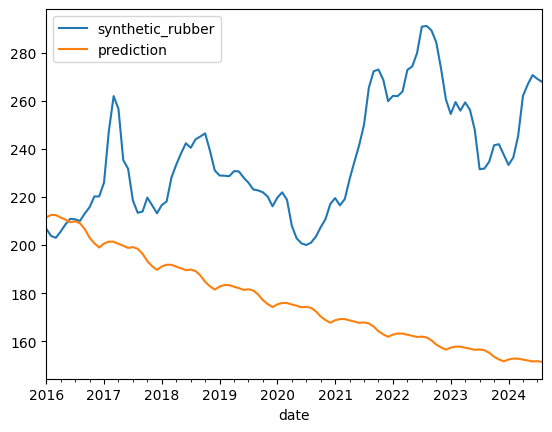

In [30]:
xvalid['prediction'] = prediction
xvalid.plot()

In [31]:
from pmdarima.arima import auto_arima
from pmdarima import pipeline
from pmdarima import model_selection
from pmdarima import preprocessing as ppc
from pmdarima import arima

In [96]:
path = r"C:\Users\HP\OneDrive\Escritorio\David Guzzi\Github\TSA\FRED_PCU325212325212P.csv"
df = pd.read_csv(path)
df.columns = ['date', 'synthetic_rubber']
df['date'] = pd.to_datetime(df['date'])
# df.set_index('date', inplace = True)

# df.head()

In [39]:
result = adfuller(df['synthetic_rubber'])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -0.955296
p-value: 0.769218
Critical Values:
	1%: -3.443
	5%: -2.867
	10%: -2.570


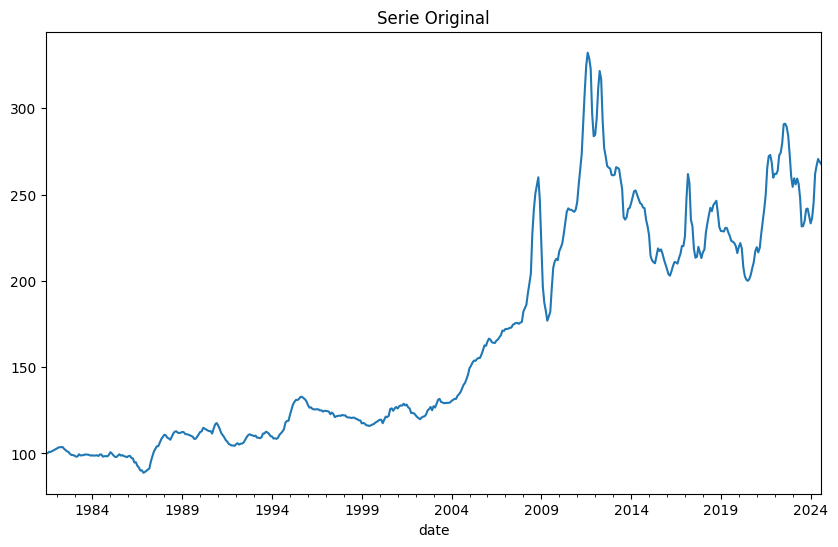

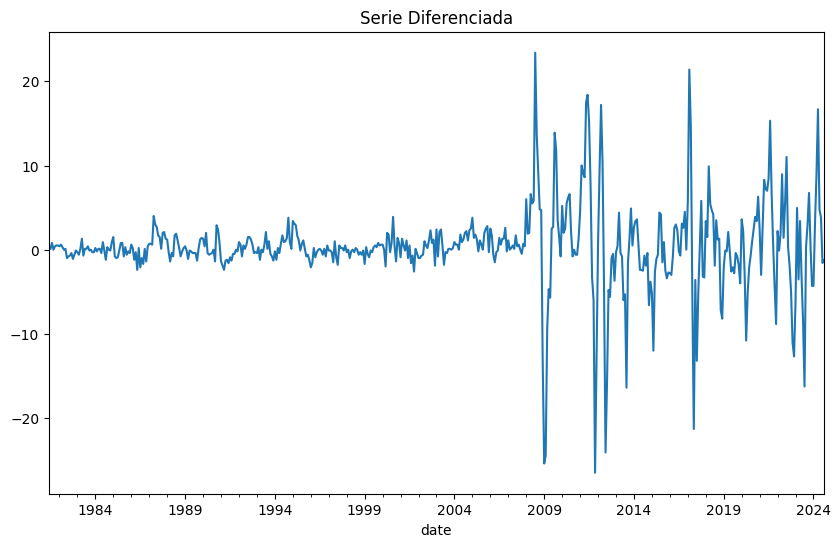

ADF Statistic: -8.710104
p-value: 0.000000
Critical Values:
	1%: -3.443
	5%: -2.867
	10%: -2.570


In [97]:
import pandas as pd
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt

# Asegúrate de que la columna 'date' sea de tipo datetime
df['date'] = pd.to_datetime(df['date'])

# Establecer la columna 'date' como índice (si aún no lo has hecho)
df.set_index('date', inplace=True)

# Graficar la serie original
plt.figure(figsize=(10,6))
df['synthetic_rubber'].plot(title='Serie Original')
plt.show()

# Aplicar la diferenciación a la serie para intentar hacerla estacionaria
df['diff_synthetic_rubber'] = df['synthetic_rubber'].diff().dropna()

# Graficar la serie diferenciada
plt.figure(figsize=(10,6))
df['diff_synthetic_rubber'].plot(title='Serie Diferenciada')
plt.show()

# Realizar la prueba ADF en la serie diferenciada
adf_result = adfuller(df['diff_synthetic_rubber'].dropna())

# Mostrar resultados de la prueba ADF
print('ADF Statistic: %f' % adf_result[0])
print('p-value: %f' % adf_result[1])
print('Critical Values:')
for key, value in adf_result[4].items():
    print('\t%s: %.3f' % (key, value))


In [103]:
tr_start,tr_end = '1984-05-01','2017-09-30'
te_start,te_end = '2017-10-01','2024-05-30'
x0 = df['diff_synthetic_rubber'][tr_start:tr_end].dropna()
x1 = df['diff_synthetic_rubber'][te_start:te_end].dropna()

In [104]:
model_autoARIMA = auto_arima(x0, start_p=7, start_q=7 ,
                      test='adf',       
                      max_p= 7, max_q=7, 
                      m= 7,              
                      d= 1,
                      seasonal=True,   
                      start_P=1, 
                      D=1, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)

Performing stepwise search to minimize aic
 ARIMA(6,1,6)(1,1,1)[7]             : AIC=inf, Time=4.70 sec
 ARIMA(0,1,0)(0,1,0)[7]             : AIC=2427.689, Time=0.03 sec
 ARIMA(1,1,0)(1,1,0)[7]             : AIC=2317.779, Time=0.10 sec
 ARIMA(0,1,1)(0,1,1)[7]             : AIC=inf, Time=0.21 sec
 ARIMA(1,1,0)(0,1,0)[7]             : AIC=2427.023, Time=0.04 sec
 ARIMA(1,1,0)(2,1,0)[7]             : AIC=2260.097, Time=0.20 sec
 ARIMA(1,1,0)(2,1,1)[7]             : AIC=inf, Time=1.05 sec
 ARIMA(1,1,0)(1,1,1)[7]             : AIC=inf, Time=0.48 sec
 ARIMA(0,1,0)(2,1,0)[7]             : AIC=2258.528, Time=0.13 sec
 ARIMA(0,1,0)(1,1,0)[7]             : AIC=2317.003, Time=0.07 sec
 ARIMA(0,1,0)(2,1,1)[7]             : AIC=inf, Time=0.82 sec
 ARIMA(0,1,0)(1,1,1)[7]             : AIC=inf, Time=0.21 sec
 ARIMA(0,1,1)(2,1,0)[7]             : AIC=2260.008, Time=0.41 sec
 ARIMA(1,1,1)(2,1,0)[7]             : AIC=inf, Time=1.23 sec
 ARIMA(0,1,0)(2,1,0)[7] intercept   : AIC=2260.525, Time=0.50 sec

B

In [105]:
print(model_autoARIMA.summary())

                                     SARIMAX Results                                     
Dep. Variable:                                 y   No. Observations:                  401
Model:             SARIMAX(0, 1, 0)x(2, 1, 0, 7)   Log Likelihood               -1126.264
Date:                           Fri, 04 Oct 2024   AIC                           2258.528
Time:                                   21:26:18   BIC                           2270.450
Sample:                               05-01-1984   HQIC                          2263.253
                                    - 09-01-2017                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L7       -0.7357      0.030    -24.521      0.000      -0.795      -0.677
ar.S.L14      -0.4062      0.034    -12.034

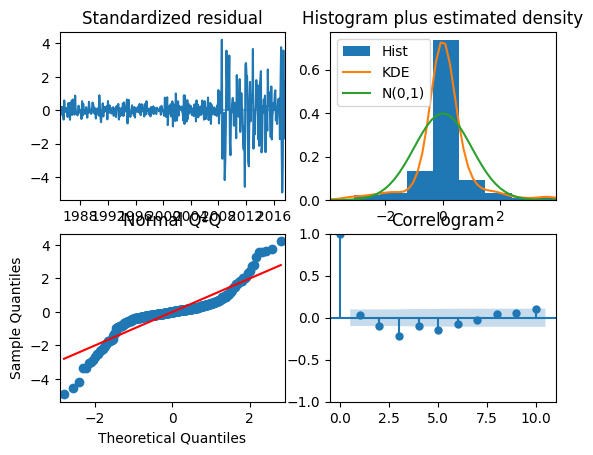

In [106]:
model_autoARIMA.plot_diagnostics()
plt.show()

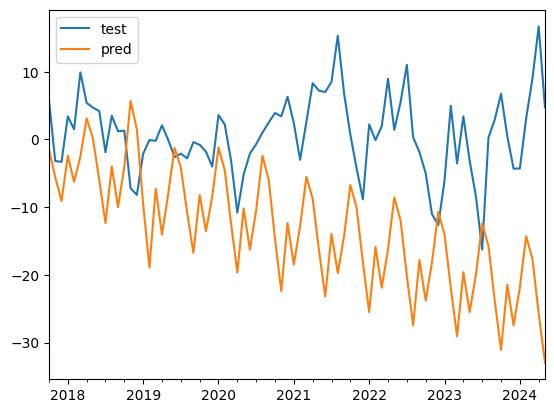

In [107]:
pred = model_autoARIMA.predict(x1.shape[0])

pd.DataFrame({'test':x1,'pred':pred}).plot();plt.show()

In [89]:
df = df.dropna()
xtrain, xvalid = model_selection.train_test_split(df['diff_synthetic_rubber'], test_size = 0.4)
pipe = pipeline.Pipeline([
    # ("fourier", ppc.FourierFeaturizer(m=4)),
    ("arima", arima.AutoARIMA(stepwise=True, trace=1, error_action="ignore",
                              seasonal=False,  # because we use Fourier
                              suppress_warnings=True))
])

pipe.fit(xtrain)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=901.171, Time=0.31 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=986.933, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=915.733, Time=0.02 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=940.735, Time=0.03 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=903.746, Time=0.06 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=903.753, Time=0.11 sec
 ARIMA(3,0,2)(0,0,0)[0]             : AIC=902.946, Time=0.32 sec
 ARIMA(2,0,3)(0,0,0)[0]             : AIC=902.843, Time=0.30 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=901.833, Time=0.13 sec
 ARIMA(1,0,3)(0,0,0)[0]             : AIC=905.686, Time=0.14 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=905.700, Time=0.15 sec
 ARIMA(3,0,3)(0,0,0)[0]             : AIC=inf, Time=0.59 sec
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=900.532, Time=0.45 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=903.145, Time=0.09 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=903.164, 

Pipeline(steps=[('arima',
                 AutoARIMA(error_action='ignore', seasonal=False, trace=1))])

In [90]:
pipe.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  310
Model:               SARIMAX(2, 0, 2)   Log Likelihood                -444.266
Date:                Fri, 04 Oct 2024   AIC                            900.532
Time:                        21:18:57   BIC                            922.951
Sample:                    07-01-1981   HQIC                           909.494
                         - 04-01-2007                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.1170      0.090      1.296      0.195      -0.060       0.294
ar.L1         -0.2283      0.078     -2.929      0.003      -0.381      -0.076
ar.L2          0.7360      0.076      9.656      0.000       0.587       0.885
ma.L1          0.5725      0.096      5.963      0.000       0.384       0.761
ma.L2         -0.3610      0.094     -3.855      0.000      -0.545      -0.177
sigma2         1.0271      0.072     14.225      0.000       0.886       1.169
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):                15.05
Prob(Q):                              0.89   Prob(JB):                         0.00
Heteroskedasticity (H):               1.84   Skew:                             0.35
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.81
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [91]:
# we compute predictions from the pipeline object
preds, conf_int = pipe.predict(n_periods= xvalid.shape[0], return_conf_int=True)
print("\nForecasts:")
print(preds)


Forecasts:
2007-05-01    0.588520
2007-06-01    0.163500
2007-07-01    0.512799
2007-08-01    0.120247
2007-09-01    0.466946
                ...   
2024-04-01    0.234655
2024-05-01    0.240548
2024-06-01    0.234775
2024-07-01    0.240430
2024-08-01    0.234890
Freq: MS, Length: 208, dtype: float64


In [86]:
print("\nConfidence intervals:")
print(conf_int)


Confidence intervals:
[[-1.39784176  2.57488151]
 [-1.93722851  2.26422856]
 [-1.66886256  2.69445985]
 [-2.09235862  2.33285313]
 [-1.77302741  2.70691946]
 [-2.14927653  2.34704423]
 [-1.82016379  2.69631947]
 [-2.17037926  2.34988396]
 [-1.84528892  2.68312252]
 [-2.17710147  2.35191496]
 [-1.86100428  2.67170529]
 [-2.17758577  2.35514163]
 [-1.8722675   2.66237376]
 [-2.17520613  2.35948248]
 [-1.88120683  2.65462167]
 [-2.17147912  2.36451249]
 [-1.88881556  2.64794671]
 [-2.1671352   2.3698747 ]
 [-1.89559209  2.64199484]
 [-2.16254457  2.37533357]
 [-1.90180148  2.63654208]
 [-2.15790072  2.3807485 ]
 [-1.90759145  2.6314525 ]
 [-2.15330603  2.38604075]
 [-1.91304791  2.62664461]
 [-2.14881429  2.39116899]
 [-1.91822307  2.62206914]
 [-2.14445278  2.39611372]
 [-1.92315039  2.61769554]
 [-2.14023425  2.40086783]
 [-1.92785265  2.61350402]
 [-2.13616336  2.40543112]
 [-1.93234647  2.60948098]
 [-2.13224035  2.40980713]
 [-1.93664482  2.60561639]
 [-2.12846304  2.41400135]
 [-1.

<Axes: >

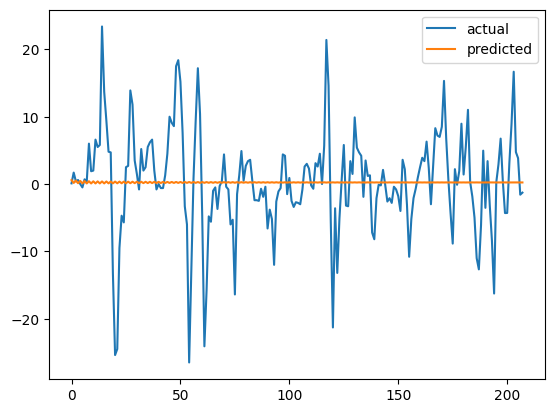

In [95]:
# let's quickly visualize the forecast
xvalid = pd.DataFrame(xvalid.values, columns = ['actual'])
preds = pd.DataFrame(preds.values, columns=['predicted'])
xvalid = pd.concat([xvalid, preds], axis=0)
xvalid.plot()

In [2]:
import rpy2.robjects as robjects
from rpy2.robjects import pandas2ri

# Activa la conversión automática de objetos de R a pandas DataFrame
pandas2ri.activate()

# Carga el archivo .rda
robjects.r['load']('C:/Users/HP/Downloads/aus_airpassengers.rda')

# Lista las variables cargadas desde el archivo
r_vars = robjects.r('ls()')

# Extrae la primera variable de las cargadas (ajusta el nombre según corresponda)
# Suponemos que la variable es un data.frame de R
my_data = robjects.r[r_vars[0]]

# Convierte el data.frame de R a un DataFrame de pandas
df = pandas2ri.rpy2py(my_data)

# Ahora df es un DataFrame de pandas
print(df.head())  # Mostrar las primeras filas del DataFrame



ModuleNotFoundError: No module named 'rpy2'